# Работа с Embeddings
Source: [embeddings.ts](source/generate_image.ts)

In [ ]:
import 'dotenv';
import { GigaChat, detectImage } from 'gigachat';
import * as dotenv from 'dotenv';
import { Agent } from 'node:https';

const httpsAgent = new Agent({
  rejectUnauthorized: false,
});

dotenv.config();
const client = new GigaChat({
    timeout: 600,
    model: 'GigaChat',
    httpsAgent: httpsAgent,
});

In [20]:
const resp = await client.chat({
    messages: [
      {
        role: 'user',
        content: 'Сгенерируй изображение котика',
      },
    ],
    function_call: 'auto',
});

In [21]:
const detectedImage = detectImage(resp.choices[0]?.message.content ?? '');
const image = await client.getImage(detectedImage.uuid);

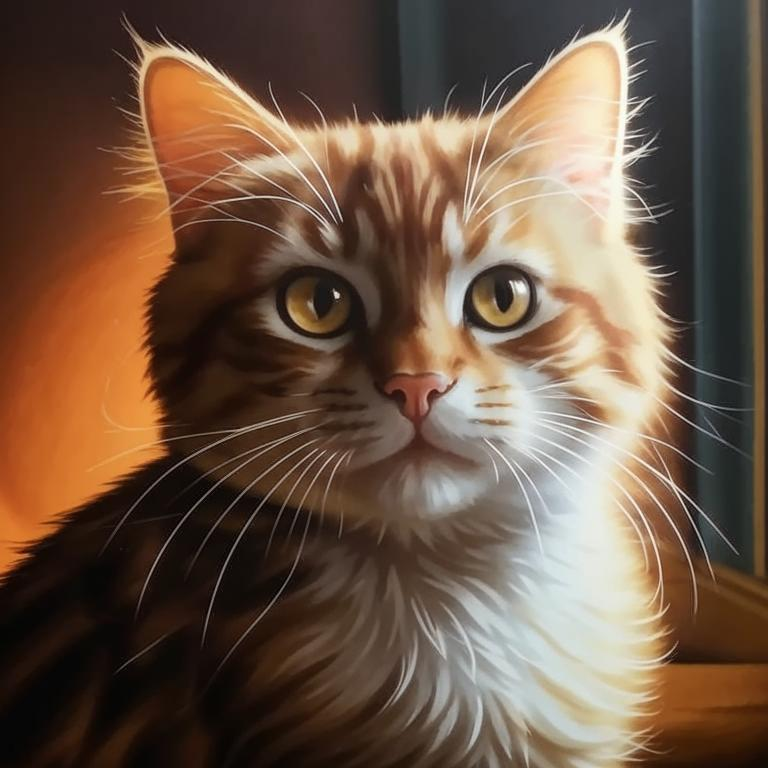

In [22]:
// Преобразуем byte string в Uint8Array, который нужен для показа изображений в jupyter deno ноутбуках
Uint8Array.from(Array.from(image.content).map(letter => letter.charCodeAt(0)));

In [23]:
`Сообщение к изображению: "${detectedImage.postfix}"`

'Сообщение к изображению: " вот так выглядит котик."'